In [4]:
import pandas as pd 
crime_data = pd.read_csv('crime2017.csv');

Read data from crime 2017 file

In [5]:
crime_data .head()

,date,block,primary_type,description,location_description,beat,district,arrest,location,domestic,community_area,updated_on
0,2017-12-02 19:15:00+00:00,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,RESIDENCE PORCH/HALLWAY,512,5.0,False,"(41.702721948, -87.619668625)",False,49,2018-02-10 15:50:01+00:00
1,2017-07-08 22:00:00+00:00,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,ALLEY,512,5.0,False,"(41.702992124, -87.626974971)",False,49,2018-02-10 15:50:01+00:00
2,2017-06-22 21:00:00+00:00,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,512,5.0,False,"(41.706936355, -87.623514952)",False,49,2018-02-10 15:50:01+00:00
3,2017-09-30 09:00:00+00:00,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,STREET,512,5.0,False,"(41.703132357, -87.612435302)",False,49,2018-02-10 15:50:01+00:00
4,2017-10-01 22:15:00+00:00,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,DRIVEWAY - RESIDENTIAL,512,5.0,False,"(41.700713642, -87.629098154)",False,49,2018-02-10 15:50:01+00:00


In [6]:
crime_data.isnull().sum()

date                       0
block                      0
primary_type               0
description                0
location_description    1043
beat                       0
district                   1
arrest                     0
location                3734
domestic                   0
community_area             0
updated_on                 0
dtype: int64

show the missing data in each feature

In [7]:
crime_data.drop(['date','location','location_description','updated_on'],axis = 1,inplace = True) 

drop all unnecessary feature, drop date, location, location_description, and udate_on because it doesn't use in data predict and visualisation 

In [8]:
crime_data.isnull().sum()

block             0
primary_type      0
description       0
beat              0
district          1
arrest            0
domestic          0
community_area    0
dtype: int64

In [9]:
crime_data.head()

,block,primary_type,description,beat,district,arrest,domestic,community_area
0,105XX S EDBROOKE AVE,ROBBERY,ARMED: HANDGUN,512,5.0,False,False,49
1,105XX S LA SALLE ST,ROBBERY,ARMED: HANDGUN,512,5.0,False,False,49
2,103XX S STATE ST,ROBBERY,ARMED: HANDGUN,512,5.0,False,False,49
3,105XX S VERNON AVE,ROBBERY,ARMED: HANDGUN,512,5.0,False,False,49
4,002XX W 106TH PL,ROBBERY,ARMED: HANDGUN,512,5.0,False,False,49


show that all mentioned feature above are already drop

In [10]:
from sklearn.preprocessing import LabelEncoder
df = crime_data.copy()
le_encoders = {}
for column in df.columns:
  if df[column].dtype == type(object):
    le = LabelEncoder()
    le_encoders[column] = le
    df[column] = le.fit_transform(df[column])

encode block feature, because this will be used in data prediction and visualisation in location base

In [11]:
df.head()

,block,primary_type,description,beat,district,arrest,domestic,community_area
0,26499,27,42,512,5.0,False,False,49
1,26516,27,42,512,5.0,False,False,49
2,26383,27,42,512,5.0,False,False,49
3,26549,27,42,512,5.0,False,False,49
4,1232,27,42,512,5.0,False,False,49


show that all block feature above are already encoded

In [12]:
df['district'].fillna(df['district'].mean(),inplace = True)

fill in district missing value 

In [13]:
df.isnull().sum()

block             0
primary_type      0
description       0
beat              0
district          0
arrest            0
domestic          0
community_area    0
dtype: int64

to check all value are no missing

In [14]:
df.head(228)

,block,primary_type,description,beat,district,arrest,domestic,community_area
0,26499,27,42,512,5.0,False,False,49
1,26516,27,42,512,5.0,False,False,49
2,26383,27,42,512,5.0,False,False,49
3,26549,27,42,512,5.0,False,False,49
4,1232,27,42,512,5.0,False,False,49
5,26525,27,42,512,5.0,False,False,49
6,1232,27,44,512,5.0,False,False,49
7,340,27,44,512,5.0,False,False,49
8,26368,27,261,512,5.0,False,False,49
9,26341,27,261,512,5.0,False,False,50


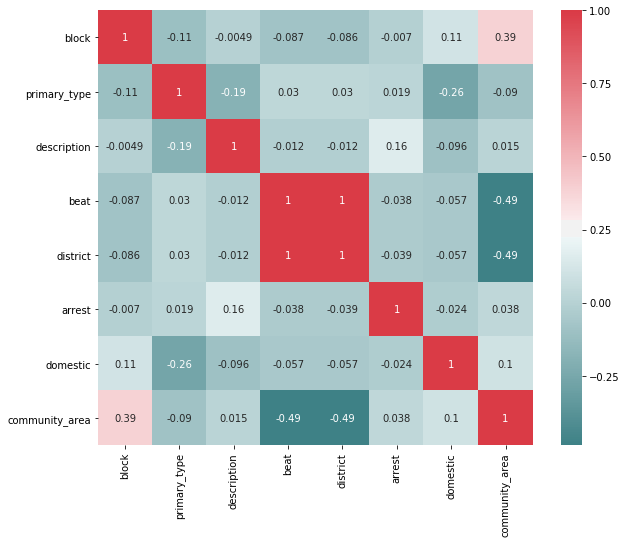

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
fi, axis = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True), square=True, ax=axis)

show heatmap to visualize that what feature have correlated with each other. Following the map, beat and district have positive correlative relationship with red level, and community and block has some correlative relationship with each other. 

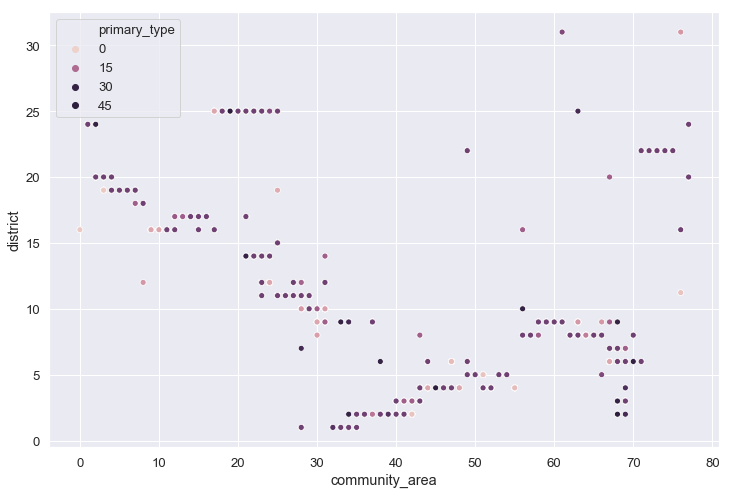

In [56]:
import seaborn as sns
plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.2)
ax = sns.scatterplot(x="community_area", y="district", hue='primary_type', data=df)

show cluster plot between community area with relative to the distric, in which each crime type scatter on each point

In [16]:
list(df.columns.values)

['block',
 'primary_type',
 'description',
 'beat',
 'district',
 'arrest',
 'domestic',
 'community_area']

In [17]:
from sklearn.preprocessing import StandardScaler
features = ['block',
 'primary_type',
 'description',
 'beat',
 'district',
 'arrest',
 'domestic',
 'community_area']
x_scale = df.loc[:, features].values
x_scale = StandardScaler().fit_transform(x_scale)
print(x_scale)


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[ 1.59517011  1.06513078 -1.24939238 ... -0.49252115 -0.43482223
   0.58157712]
 [ 1.59719948  1.06513078 -1.24939238 ... -0.49252115 -0.43482223
   0.58157712]
 [ 1.5813226   1.06513078 -1.24939238 ... -0.49252115 -0.43482223
   0.58157712]
 ...
 [-0.96267879  0.21408953  0.97299107 ...  2.03036967 -0.43482223
  -0.3526943 ]
 [-0.26922921  0.72471428  1.03501107 ... -0.49252115 -0.43482223
  -0.3526943 ]
 [-0.80892374  0.72471428  0.38380104 ... -0.49252115 -0.43482223
  -0.3526943 ]]


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


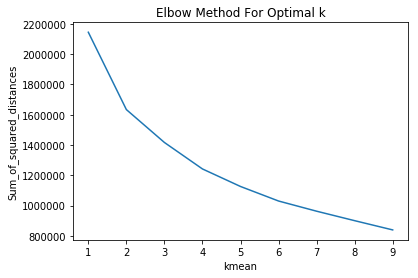

In [18]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
for k in range(1,10):
    model_kmean = KMeans(n_clusters=k)
    kmean = model_kmean.fit(x_scale)
    Sum_of_squared_distances.append(kmean.inertia_)

plt.plot(range(1,10), Sum_of_squared_distances)
plt.xlabel('kmean')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [84]:
kmeans = KMeans(n_clusters=2)
model_kmeans = kmeans.fit(x_scale)
cluster_location= model_kmeans.predict(x_scale)
print(cluster_location)

[1 1 1 ... 0 0 0]


In [39]:
df['Cluster_location'] = cluster_location

Cluster new location with relate to the crime data. This can seperate to two location that crime can happen with there are about a crime type that can ouccur in location 0 and 1. But other crime seperate to two cluster location both 0 and 1

In [40]:
df.head(228)

,block,primary_type,description,beat,district,arrest,domestic,community_area,Cluster_location
0,26499,27,42,512,5.0,False,False,49,0
1,26516,27,42,512,5.0,False,False,49,0
2,26383,27,42,512,5.0,False,False,49,0
3,26549,27,42,512,5.0,False,False,49,0
4,1232,27,42,512,5.0,False,False,49,0
5,26525,27,42,512,5.0,False,False,49,0
6,1232,27,44,512,5.0,False,False,49,0
7,340,27,44,512,5.0,False,False,49,0
8,26368,27,261,512,5.0,False,False,49,0
9,26341,27,261,512,5.0,False,False,50,0


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scale)

[0.30495353 0.16754899]


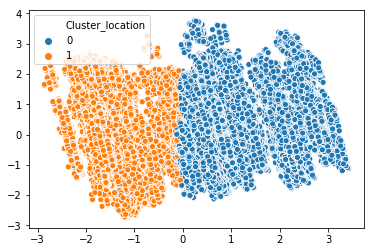

In [90]:
import seaborn as sns
print(pca.explained_variance_ratio_)
sns.scatterplot(principalComponents[:,0] ,principalComponents[:,1],hue =df['Cluster_location'] )

The map show the scatter of cluster location with determined by the data related to each crime type

Following all the code below, it use the same step with crime 2017 but apply to crime 2018 to illustrate the similar and different between two of them

In [66]:
import pandas as pd 
crime_data_2 = pd.read_csv('crime2018.csv');

In [67]:
crime_data_2.isnull().sum()

date                       0
block                      0
primary_type               0
description                0
location_description     774
beat                       0
district                   0
arrest                     0
location                2935
domestic                   0
community_area             2
updated_on                 0
dtype: int64

In [68]:
crime_data_2.drop(['date','location','location_description','updated_on'],axis = 1,inplace = True) 

In [69]:
crime_data_2.head()

,block,primary_type,description,beat,district,arrest,domestic,community_area
0,106XX S LAFAYETTE AVE,HOMICIDE,FIRST DEGREE MURDER,512,5,True,False,49.0
1,105XX S WENTWORTH AVE,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,512,5,False,False,49.0
2,104XX S CORLISS AVE,ROBBERY,ARMED: HANDGUN,512,5,False,False,50.0
3,103XX S MICHIGAN AVE,ROBBERY,ARMED: HANDGUN,512,5,False,False,49.0
4,103XX S CORLISS AVE,ROBBERY,STRONGARM - NO WEAPON,512,5,False,True,50.0


In [70]:
df_2 = crime_data_2.copy()

In [71]:
df_2.head()

,block,primary_type,description,beat,district,arrest,domestic,community_area
0,106XX S LAFAYETTE AVE,HOMICIDE,FIRST DEGREE MURDER,512,5,True,False,49.0
1,105XX S WENTWORTH AVE,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,512,5,False,False,49.0
2,104XX S CORLISS AVE,ROBBERY,ARMED: HANDGUN,512,5,False,False,50.0
3,103XX S MICHIGAN AVE,ROBBERY,ARMED: HANDGUN,512,5,False,False,49.0
4,103XX S CORLISS AVE,ROBBERY,STRONGARM - NO WEAPON,512,5,False,True,50.0


In [73]:
from sklearn.preprocessing import LabelEncoder
le_encoders = {}
for column in df_2.columns:
  if df_2[column].dtype == type(object):
    le = LabelEncoder()
    le_encoders[column] = le
    df_2[column] = le.fit_transform(df_2[column])

In [74]:
df_2['community_area'].fillna(df['community_area'].mean(),inplace = True)

In [75]:
df_2.isnull().sum()

block             0
primary_type      0
description       0
beat              0
district          0
arrest            0
domestic          0
community_area    0
dtype: int64

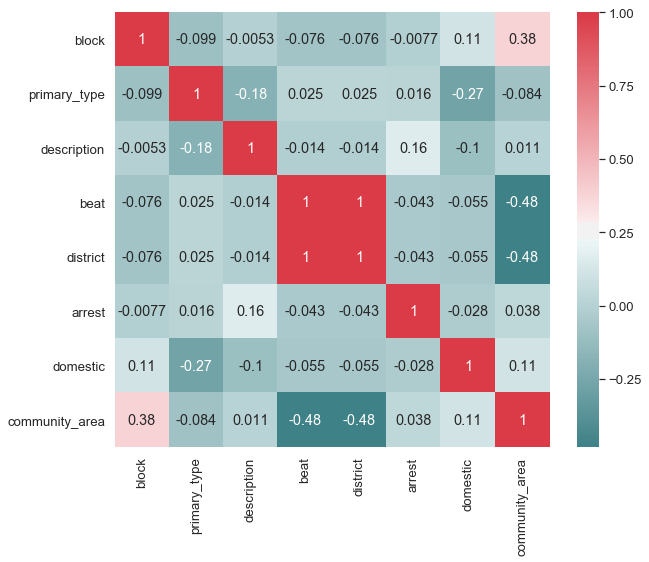

In [76]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
fi, axis = plt.subplots(figsize=(10, 8))
corr = df_2.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True), square=True, ax=axis)

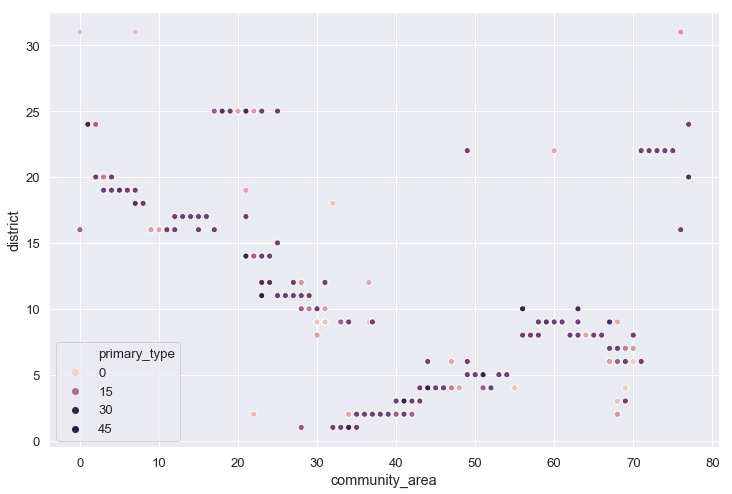

In [87]:
import seaborn as sns
plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.2)
ax = sns.scatterplot(x="community_area", y="district", hue='primary_type', data=df_2)

In [94]:
from sklearn.preprocessing import StandardScaler
features = ['block',
 'primary_type',
 'description',
 'beat',
 'district',
 'arrest',
 'domestic',
 'community_area']
x_scale_2 = df.loc[:, features].values
x_scale_2 = StandardScaler().fit_transform(x_scale_2)
print(x_scale_2)


[[ 1.59517011  1.06513078 -1.24939238 ... -0.49252115 -0.43482223
   0.58157712]
 [ 1.59719948  1.06513078 -1.24939238 ... -0.49252115 -0.43482223
   0.58157712]
 [ 1.5813226   1.06513078 -1.24939238 ... -0.49252115 -0.43482223
   0.58157712]
 ...
 [-0.96267879  0.21408953  0.97299107 ...  2.03036967 -0.43482223
  -0.3526943 ]
 [-0.26922921  0.72471428  1.03501107 ... -0.49252115 -0.43482223
  -0.3526943 ]
 [-0.80892374  0.72471428  0.38380104 ... -0.49252115 -0.43482223
  -0.3526943 ]]


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


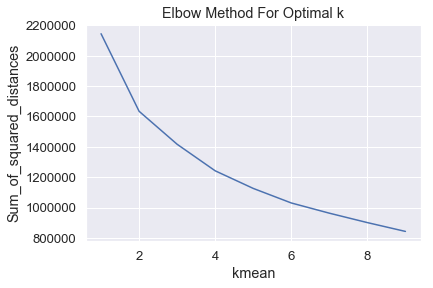

In [95]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
for k in range(1,10):
    model_kmean = KMeans(n_clusters=k)
    kmean = model_kmean.fit(x_scale_2)
    Sum_of_squared_distances.append(kmean.inertia_)

plt.plot(range(1,10), Sum_of_squared_distances)
plt.xlabel('kmean')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [96]:
kmeans = KMeans(n_clusters=2)
model_kmeans = kmeans.fit(x_scale_2)
cluster_location_2= model_kmeans.predict(x_scale_2)
print(cluster_location_2)

[0 0 0 ... 1 1 1]


In [97]:
df_2.shape

(265941, 9)

In [98]:
len(cluster_location_2)

268045

In [99]:
df_2['Cluster_region'] = cluster_location_2[0:265941]

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scale_2)

[0.30495353 0.16754899]


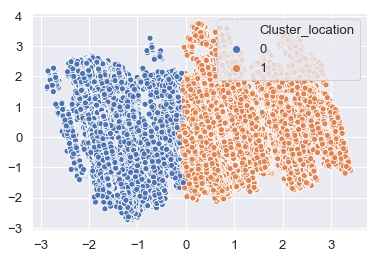

In [102]:
import seaborn as sns
print(pca.explained_variance_ratio_)
sns.scatterplot(principalComponents[:,0] ,principalComponents[:,1],hue =df['Cluster_location'] )

In [43]:
from sklearn.model_selection import train_test_split

X= df.drop('primary_type', axis=1)

Y = df['primary_type']

X_train, X_rest, Y_train, Y_rest = train_test_split( X, Y, test_size=0.20)
X_valid, X_test, Y_valid, Y_test = train_test_split(  X_rest, Y_rest, test_size=0.50)

print('Training shape: ', X_train.shape, Y_train.shape)
print('Valid shape: ', X_valid.shape, Y_valid.shape)
print('Test shape: ', X_test.shape, Y_test.shape)

Training shape:  (214436, 8) (214436,)
Valid shape:  (26804, 8) (26804,)
Test shape:  (26805, 8) (26805,)


In [82]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, Y_train)
predictions_test = linear.predict(X_test)
print(predictions_test)

[12.62348057 12.2071013  13.97221559 ... 17.62825609  8.84711951
 21.57396411]


In [104]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error of test prediction test:" , mean_squared_error( predictions_test,Y_test))

Mean squared error of test prediction test: 121.52834591768703


In [85]:
from sklearn.linear_model import Ridge
Ridge_model = Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge_model.fit(X_train , Y_train) 
Ridge_predict = Ridge_model.predict( X_test)
print(Ridge_predict )

[12.62333067 12.20677615 13.97177284 ... 17.62753222  8.84988684
 21.57349239]


In [86]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error of test split:" , mean_squared_error( Ridge_predict,Y_test))

Mean squared error of test split: 121.91575325818158
